# Marketing A/B Testing Analysis

## In this project we conduct a A/B testing using real-world dataset from Kaggle that examines the conversion status when an ad is displayed to a versus when a general public service announcement is displayed to test group. We will assess the relationship between the different categorical and numerical variables and the conversion status to understand what factors play a critical role in conversion. Tests performed: Chi-Squared test, Mann-Whitney U test 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data 

df = pd.read_csv("C:/Sharayu Portfolio/Sharayu Project/AB Testing in Python/archive (2)/marketing_AB.csv")

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
#Check if there are any duplicates
df.duplicated().sum()

0

## Drop the unwanted columns such as “Unnamed: 0” and “user id”, as they will not be used as predictors anywhere.


In [5]:
#Drop unwanted columns
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [6]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [7]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

## Select all the categorical variables and check if they have appropriate levels

In [8]:
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

### Print the name of columns and display all the unique levels to check if they are appropriately defined

In [9]:
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate Analysis

## Pick each variable, one at a time and visualize it

### 1. Test Group

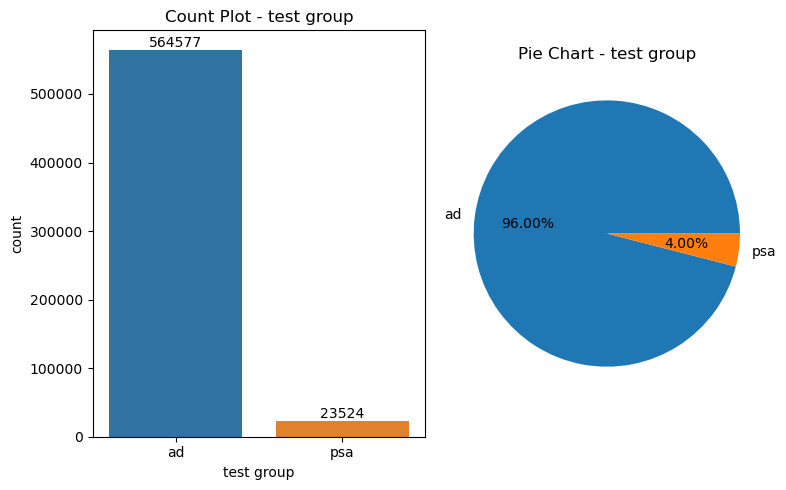

In [10]:
variable = 'test group'

plt.figure(figsize = (8,5))

#Count plot
plt.subplot(1, 2, 1)
v1 = sns.countplot(x=variable, data=df_cat)
v1.bar_label(v1.containers[0])
plt.title(f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1, 2, 2)
counts =  df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

### From the visualization we can see that 4 percent of the people were shown the public service annoucements and 96 percent were shown ads. 

### 2. Converted

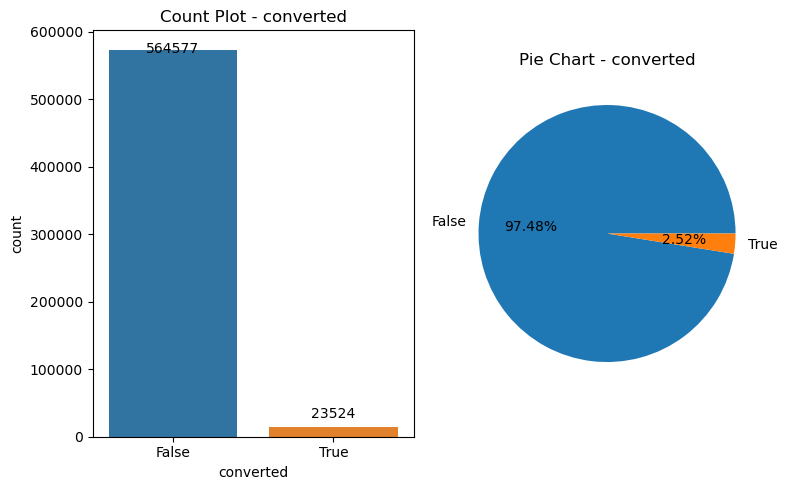

In [11]:
variable = 'converted'

plt.figure(figsize = (8,5))

#Count plot
plt.subplot(1, 2, 1)
v2 = sns.countplot(x=variable, data=df_cat)
v2.bar_label(v1.containers[0])
plt.title(f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1, 2, 2)
counts =  df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

### We can see that there is only 2.52 percent conversion

### 3. Most ads day

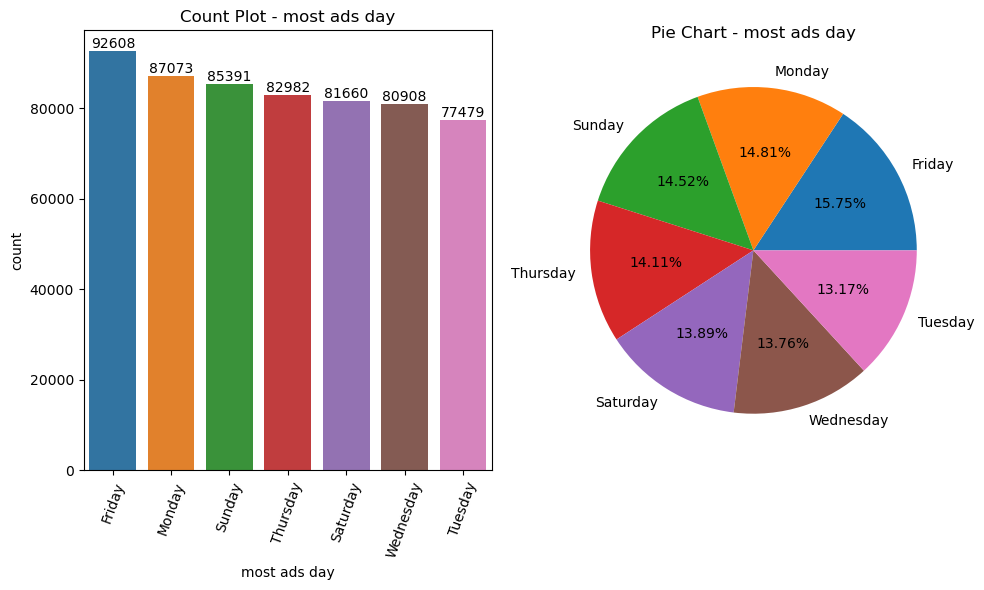

In [12]:
variable = 'most ads day'

plt.figure(figsize = (10,6))

#Count plot
plt.subplot(1, 2, 1)
v3 = sns.countplot(x=variable, data=df_cat, order = df_cat['most ads day'].value_counts().index)
# Add labels to all bars
for container in v3.containers:
    v3.bar_label(container)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=70)

#Pie Chart
plt.subplot(1, 2, 2)
counts =  df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

### Friday is the day where most ads were seen

### 4. Most ads hours

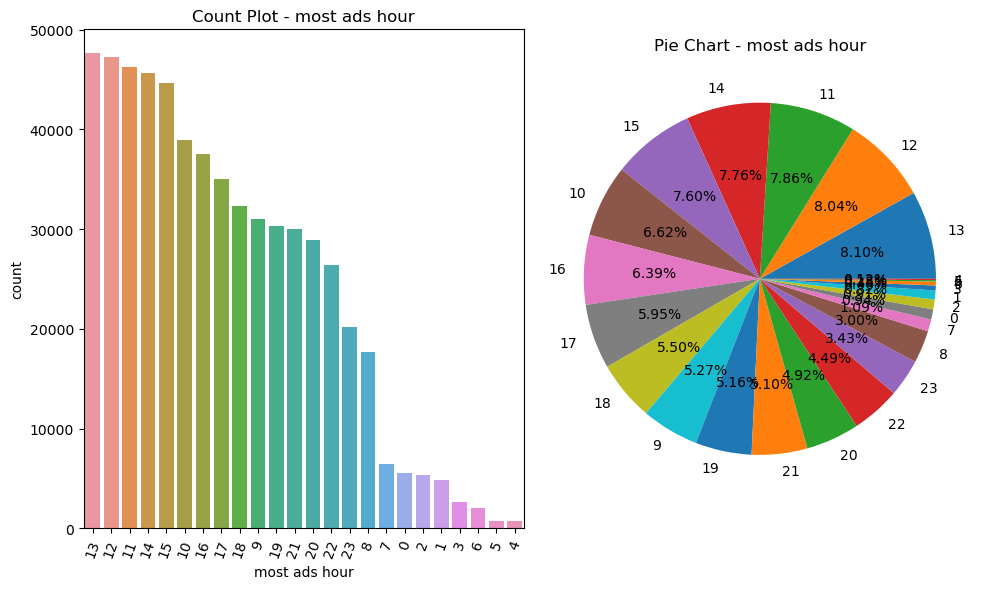

In [13]:
variable = 'most ads hour'

plt.figure(figsize = (10,6))

#Count plot
plt.subplot(1, 2, 1)
v4 = sns.countplot(x=variable, data=df_cat, order = df_cat['most ads hour'].value_counts().index)

plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=70)

#Pie Chart
plt.subplot(1, 2, 2)
counts =  df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

### Maximum ads are displayed at 1 PM

### 5. Total ads

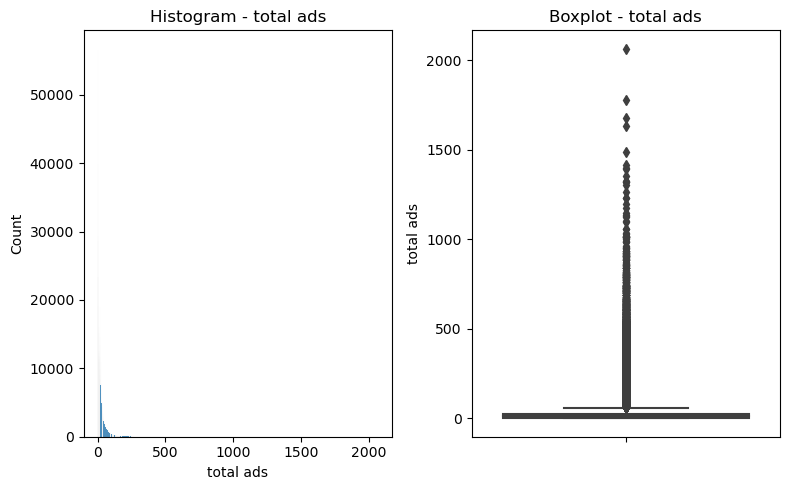

In [14]:
variable = 'total ads'

plt.figure(figsize = (8,5))

#Histogram
plt.subplot(1, 2, 1)
v5 = sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')


#Pie Chart
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data= df)
plt.title(f'Boxplot - {variable}')


#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

### We see that histograms is hardly visible and box plot also looks a lot skewed. Thus, to make this better we will first check the descriptive statistics of this feature.

In [15]:
# Check descriptive stats
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

### From above results, we can see that 27 is the 75th percentile. We will try to filter this column with respect to certain values and see if we get better visualization. 

### We will display the visualization for values less than 50 because it mostly has outliers and thus histogram is not visible. 

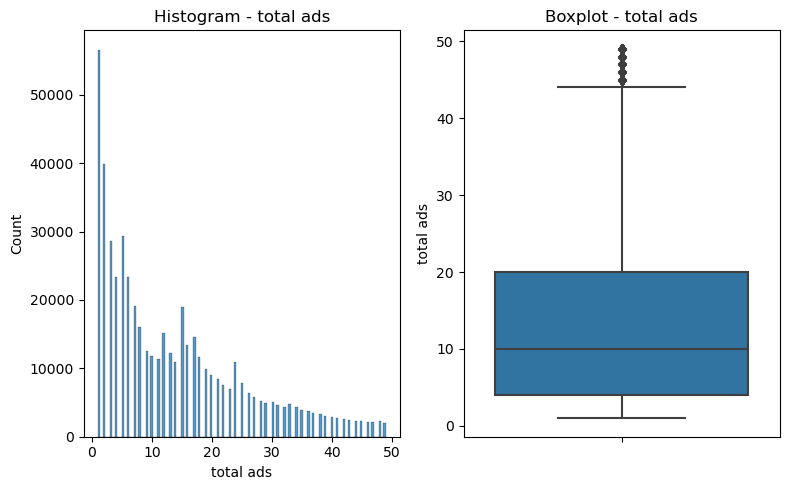

In [16]:
variable = 'total ads'

plt.figure(figsize = (8,5))

#Histogram
plt.subplot(1, 2, 1)
v5 = sns.histplot(x=variable, data=df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')


#Pie Chart
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data= df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')


#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

### Now we get better visualizations as we narrowed down the scale in terms of values. From boxplot we can see the median is around 10 ads

# Key Insights from Univariate Analysis

### - 96% of users saw ads, while 4% saw public service announcements.
### - Conversion rate was 2.52%.
### - Most ads were seen on Fridays and at 1 PM.

# Bivariate Analysis

In [17]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

### We are creating a crosstab taking "test group" with "converted" and we are normalizing it

In [18]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index' )
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


### Reading the crosstab we can tell that out of all the people who have seen the ad 2.5% people have purchased and out of all the people who've seen the public service announcement only 1.78% people have purchased

### Now we will go ahead and do same thing for most ads per day versus converted. As we are considering most ads per day, our crosstab will be having multiple values, that is, seven days of the week so seven rows. We're also sorting it by the conversion rate whenever the conversion is true we are doing good descending sort and then we create a bar

converted        False      True
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


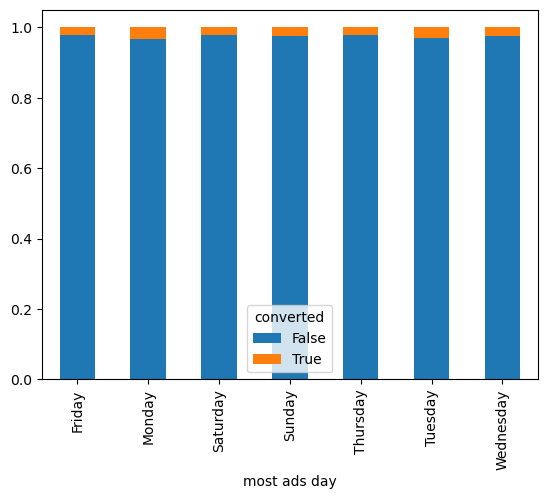

In [19]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index' )
print(ct_conversion_day.sort_values(by =  True, ascending = False))
ct_conversion_day.plot.bar(stacked = True,);

### We get to see the value corresponding to the day when the maximum conversions have happened. It looks like Monday is a day when maximum conversions have happened with conversion rate of 3.2% and subsequently we have Tuesday, Wednesday and so on

### Most ads hour versus converted

converted         False      True
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


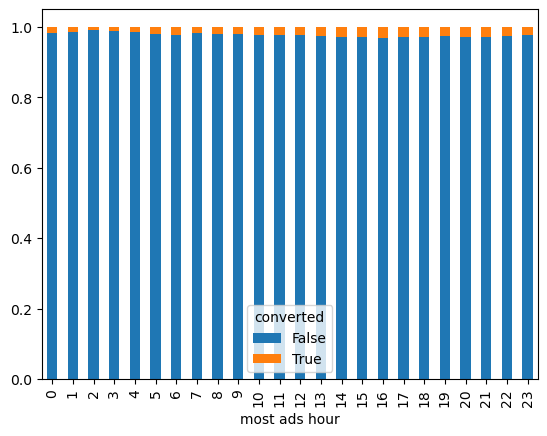

In [20]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index' )
print(ct_conversion_hour.sort_values(by =  True, ascending = False))
ct_conversion_hour.plot.bar(stacked = True,);

### It looks like conversion rate is maximum at 4:00 PM, then at 8:00 PM, then at 3:00 PM so on. From the above results we can identify specific time intervals where people are more likely to make purchases.

## Pair the "converted" with the "total ads" columns to create a box plot

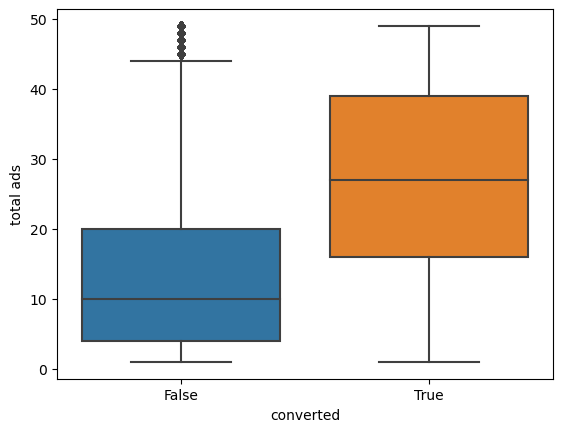

In [21]:
sns.boxplot(x='converted', y = 'total ads', data = df[df['total ads'] < 50]);

### In case of people who made purchases, median number of ads that they have seen is around 25 versus the people who have not not made purchase the median number of ads that they've seen is around 10. Thus, there is a difference in the number of times the ads were shown to people and that could have also led to a conversion. Hence, we can say that repeated marketing/advertising seems to be helping to increase the number of purchases.

# Statistical Tests

## Perform Chi Squared Test between categorical variables and converted column

In [25]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])   #Create a contingency table (cross-tabulation)
        
        chi2, p, _, _ = chi2_contingency(contingency_table)                      #perform chi-squared test
        
        print(f"\nChi-squared test for {variable} vs. converted:")               #Display the results
        print(f"\Chi-sqaured value: {chi2}")
        print(f"p-value: {p}")
        
        #check for significance
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant.")
        else:
            print("There is no significant difference in conversion rates across {variable}.")
                
        


Chi-squared test for test group vs. converted:
\Chi-sqaured value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted:
\Chi-sqaured value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted:
\Chi-sqaured value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


## Insights 

### Test group vs. converted: 
P value is much less than .05 which means that the difference in conversion rates across test group is significant. Thus, we can say that showing the ad makes a difference 

### Most ads day vs. converted
P value is much less than .05 which says the difference in conversion rates across most ads day is statistically significant. Thus, we can say that the day on which the ads are shown matters and makes a difference. We can identify those days from our above visualizations.  

### Most ads hour vs. converted
The difference in conversion rates across most ads hour is statistically significant which means that the hour of the day when the ad is shown aslo makes a difference. Thus, rather than running the campaign uniformly throughout the day we will focus heavily on certain lean hours where the people are more likely to click on the ad.

In [26]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

## Perform tests between the numerical variables and converted column

In [32]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#Step 1: Check assumptions
#Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df [df['converted'] == True] ['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df [df['converted'] == False] ['total ads']) 

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}") 
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}") 
# Equality of variances assumption 
levene_stat, levene_p_value = levene(df[df ['converted']] ['total ads'], df[~df['converted']] ['total ads']) 
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group): p-value = 0.0
Shapiro-Wilk test for normality (False group): p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


### We assumed that data is normally distributed. After conducting Shapiro tests, we can see that our assumptions are not satisfied in any of these cases. The variances are not equal either. Thus, as these tests failed we will go ahead and conduct Mann-Whitney U test. 

In [35]:
#Step 2: Perform a Suitable Test 
alpha = 0.05 

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha: 
    # Assumptions met - use t-test for means 
    t_stat, t_p_value = test_ind(df [df['converted']] ['total ads'], df [~df['converted']] ['total ads']) 
    print (f"Independent two-sample t-test: p-value = {t_p_value}") 
else: 
        # Assumptions not met - use Mann-Whitney U test for medians 
        u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']] ['total ads']) 
        print (f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0


### The P value is 0. It suggests that when it comes to the conversion status of people it does make a difference what is the median amount of total ads that they've seen. In the above visualizations also people who converted their median number of ads they saw was about 25 and the people who did not convert their median number of ads they saw was around 10. It is also confirmed statistically. 

# Conclusion

### All factors seem to play a critical role in converting people to customers. First there was a difference between the people who saw the ad versus who did not see the ad. Then there was a difference with respect to the day when the ad was shown to people then there was also a difference with the respect to the time slot when the maximum ads were shown to the people. Then finally it was also important as to how many times you're targeting the same customer again and again because repetitive watching of the ad seems to be helping to make people want to make a purchase.       

### This A/B testing project revealed that advertisements significantly outperform public service announcements in driving user conversions. Key insights include the identification of optimal times and days for ad display, contributing to more effective marketing strategies. The analysis highlighted the importance of targeted advertising in increasing conversion rates.








# Thank You